# Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

## Grouping Data

In [4]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.492288,-0.192456
1,bar,one,-1.822893,0.168683
2,foo,two,-0.189103,0.795554
3,bar,three,-0.620813,0.820752
4,foo,two,0.014333,-0.515070
5,bar,two,-0.208669,-1.559323
6,foo,one,-0.726858,-0.212262
7,foo,three,-1.072533,-0.147484


In [5]:
#This is a DataFrameGroupBy object
type(df.groupby('A'))

pandas.core.groupby.DataFrameGroupBy

In [6]:
df.groupby('A').count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [7]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.652375,-0.569888
foo,-1.481874,-0.271719


In [8]:
df.groupby('A').mean()

,C,D
A,,
bar,-0.884125,-0.189963
foo,-0.296375,-0.054344


In [9]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one   -1.822893  0.168683
    three -0.620813  0.820752
    two   -0.208669 -1.559323
foo one   -0.117285 -0.202359
    three -1.072533 -0.147484
    two   -0.087385  0.140242

In [10]:
# descriptive statistics
df.groupby('A').describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   3.0 -0.884125  0.838707 -1.822893 -1.221853 -0.620813 -0.414741   
foo   5.0 -0.296375  0.615990 -1.072533 -0.726858 -0.189103  0.014333   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar -0.208669   3.0 -0.189963  1.229902 -1.559323 -0.695320  0.168683   
foo  0.492288   5.0 -0.054344  0.496810 -0.515070 -0.212262 -0.192456   

                         
          75%       max  
A                        
bar  0.494718  0.820752  
foo -0.147484  0.795554

## Aggregations

In [11]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=10))
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,1.231801,-0.471391,1.444538
2000-01-02,-0.173329,1.104813,-0.320512
2000-01-03,0.209943,-0.516403,-0.184417
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.432897,-0.092195,-1.139609
2000-01-09,-0.745602,-1.248892,1.128768
2000-01-10,0.834598,-0.266208,-0.927784


In [12]:
#you can also create custom describe functions with agg() and functools module
tsdf.agg(['sum', lambda x: x.mean()])

,A,B,C
sum,2.790309,-1.490275,0.000985
<lambda>,0.465051,-0.248379,0.000164


## Pivot Tables

In [13]:
df2 = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
df2

,A,B,C,D,E
0,one,A,foo,-1.901285,-0.340819
1,one,B,foo,-0.663274,0.134035
2,two,C,foo,2.019186,0.565769
3,three,A,bar,-1.743497,1.186628
4,one,B,bar,-0.740658,-0.063851
5,one,C,bar,1.553587,0.699906
6,two,A,foo,-0.553822,1.501318
7,three,B,foo,2.090301,2.642970
8,one,C,foo,0.929636,0.325999
9,one,A,bar,-0.354243,-0.574427


In [14]:
pd.pivot_table(df2, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.354243 -1.901285
      B -0.740658 -0.663274
      C  1.553587  0.929636
three A -1.743497       NaN
      B       NaN  2.090301
      C  0.268587       NaN
two   A       NaN -0.553822
      B  1.159867       NaN
      C       NaN  2.019186

In [15]:
pd.pivot_table(df2, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)

C             bar       foo
A     B                    
one   A -0.354243 -1.901285
      B -0.740658 -0.663274
      C  1.553587  0.929636
three A -1.743497       NaN
      B       NaN  2.090301
      C  0.268587       NaN
two   A       NaN -0.553822
      B  1.159867       NaN
      C       NaN  2.019186

## Time Series

In [16]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25329
Freq: 5T, dtype: int64

In [17]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.524967
2012-03-07 00:00:00+00:00   -1.101985
2012-03-08 00:00:00+00:00   -0.249853
2012-03-09 00:00:00+00:00    1.507314
2012-03-10 00:00:00+00:00    0.003704
Freq: D, dtype: float64

In [18]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.524967
2012-03-06 19:00:00-05:00   -1.101985
2012-03-07 19:00:00-05:00   -0.249853
2012-03-08 19:00:00-05:00    1.507314
2012-03-09 19:00:00-05:00    0.003704
Freq: D, dtype: float64

## Descriptive statistics

In [19]:
#create df from dicts
df3 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df3

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [20]:
#create DF from Random data
df4 = pd.DataFrame(np.random.randn(10,4))
df4

,0,1,2,3
0,-0.763857,-0.487816,-0.507478,0.257762
1,-1.769673,0.770365,2.023570,1.160802
2,-0.902367,0.138136,-1.334416,-0.352162
3,0.626511,-1.303670,-0.413862,0.910684
4,-0.908464,-0.612888,-0.684687,1.271319
5,0.564610,1.372865,-0.525455,1.174021
6,3.099550,0.765800,0.676726,-0.922971
7,-0.057838,1.796920,-0.774847,0.220651
8,0.490238,0.032031,-0.121923,-2.641561
9,0.409998,-0.359350,-1.131686,-1.527560


In [21]:
df4.describe()

,0,1,2,3
count,10.000000,10.000000,10.000000,10.000000
mean,0.078871,0.211239,-0.279406,-0.044901
std,1.334286,0.960889,0.978801,1.314599
min,-1.769673,-1.303670,-1.334416,-2.641561
25%,-0.867739,-0.455700,-0.752307,-0.780269
50%,0.176080,0.085084,-0.516466,0.239206
75%,0.546017,0.769224,-0.194907,1.098273
max,3.099550,1.796920,2.023570,1.271319


In [22]:
df4.mean()

0    0.078871
1    0.211239
2   -0.279406
3   -0.044901
dtype: float64

In [23]:
#kurtosis
df4.kurtosis()

0    2.374658
1   -0.650275
2    2.990670
3   -0.022664
dtype: float64

In [24]:
#skew
df4.skew()

0    1.118029
1    0.208196
2    1.641287
3   -0.899324
dtype: float64

### Descriptive stats using apply

In [25]:
df4.apply(np.sum)

0    0.788708
1    2.112393
2   -2.794057
3   -0.449014
dtype: float64

In [26]:
df4.apply(lambda x: x.max() - x.min())

0    4.869223
1    3.100591
2    3.357986
3    3.912880
dtype: float64

## Histograms / Frequency tables

In [27]:
#Series value count
df4.iloc[:,0].value_counts()

-0.902367    1
-0.763857    1
-1.769673    1
-0.057838    1
 0.626511    1
 3.099550    1
 0.490238    1
 0.564610    1
 0.409998    1
-0.908464    1
Name: 0, dtype: int64

### Discretizing  or categorizing continuous data

In [28]:
arr = np.random.randn(20)
factor = pd.cut(arr, 4)
factor.value_counts()

(-1.798, -0.961]    6
(-0.961, -0.127]    4
(-0.127, 0.707]     6
(0.707, 1.541]      4
dtype: int64

In [29]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])
factor.value_counts()

(-5, -1]    5
(-1, 0]     6
(0, 1]      6
(1, 5]      3
dtype: int64

In [30]:
#relative frequencies or normalizing


## Compute Quantiles

In [31]:
arr = np.random.randn(30)
factor = pd.qcut(arr, [0, .25, .5, .75, 1])
pd.value_counts(factor)

(0.894, 1.794]      8
(-1.724, -0.371]    8
(0.307, 0.894]      7
(-0.371, 0.307]     7
dtype: int64

## Plotting

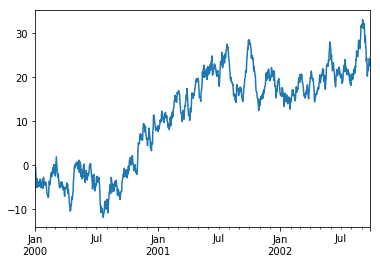

In [32]:
#plot timeseries
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

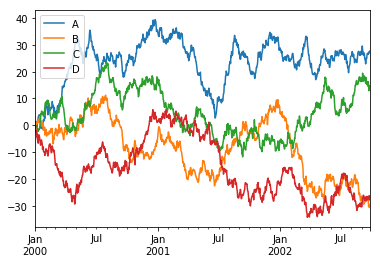

In [33]:
#plot dataframe
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [34]:
#create DF from Random data
df5 = pd.DataFrame(np.random.randn(10,4),columns=['F1','F2','F3','Label'])
df5.F1 = pd.Series(['one','one','one','two','two','two','three','three','three','Pi'])
df5

,F1,F2,F3,Label
0,one,-0.707966,-1.221326,-0.494148
1,one,-0.213670,0.017996,-1.591660
2,one,-0.654339,0.174330,-1.502677
3,two,-1.213807,-0.186389,-0.227266
4,two,0.076490,-1.475491,-0.071623
5,two,0.419821,-0.136189,0.736334
6,three,-0.184905,-0.514596,0.201095
7,three,1.157533,0.446570,0.834996
8,three,-0.654177,0.378261,0.877616
9,Pi,1.562309,0.607270,-0.562651


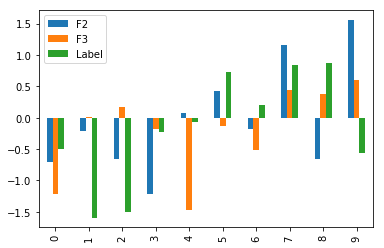

In [35]:
df5.plot.bar()

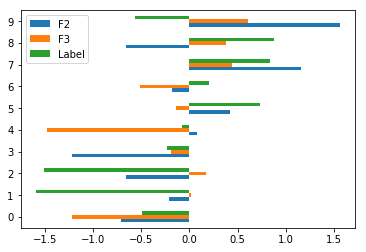

In [36]:
df5.plot.barh()

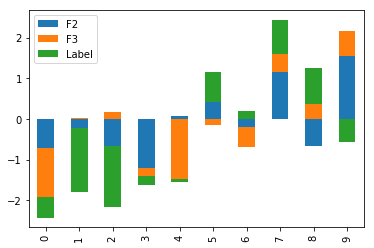

In [37]:
df5.plot.bar(stacked=True)

In [38]:
#conditional barplot???

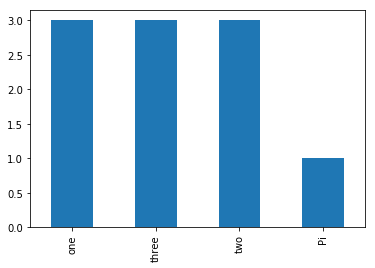

In [39]:
df5.F1.value_counts().plot.bar()

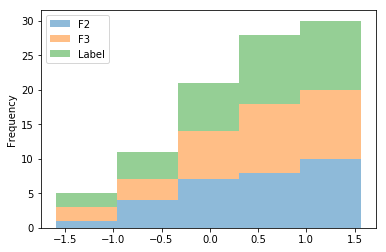

In [40]:
df5.plot.hist(bins=5, alpha=0.5, stacked=True, orientation='vertical', cumulative=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ed56d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ef0e128>]], dtype=object)

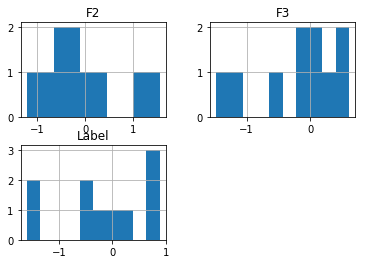

In [41]:
df5.hist()

In [42]:
#conditional histogram???

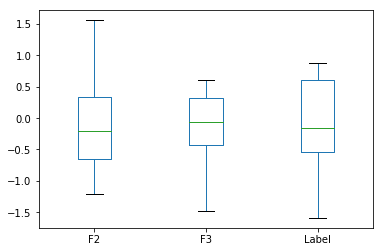

In [43]:
df5.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f0566a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f304908>]], dtype=object)

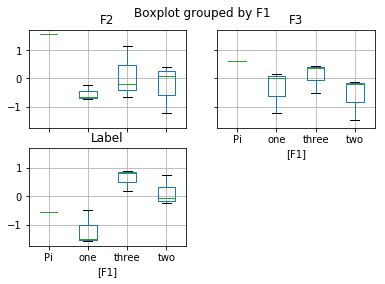

In [44]:
plt.figure()
df5.boxplot(by='F1', vert=True)

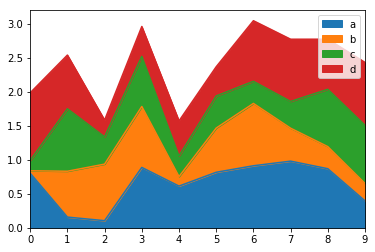

In [45]:
df6 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df6.plot.area();

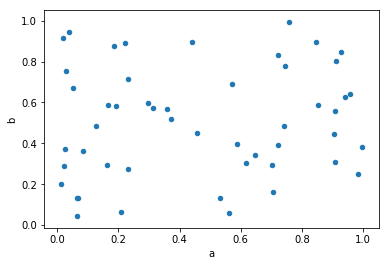

In [46]:
df7 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df7.plot.scatter(x='a', y='b');

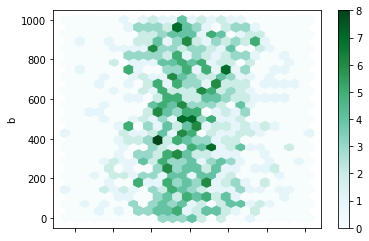

In [47]:
df8 = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df8['b'] = df8['b'] + np.arange(1000)

df8.plot.hexbin(x='a', y='b', gridsize=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f957278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fdc0048>]], dtype=object)

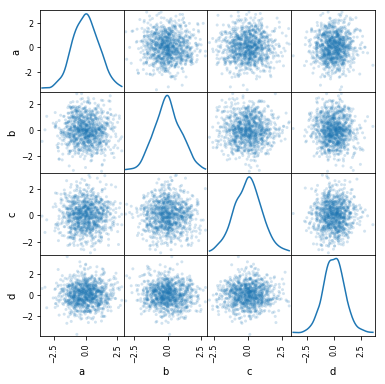

In [48]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

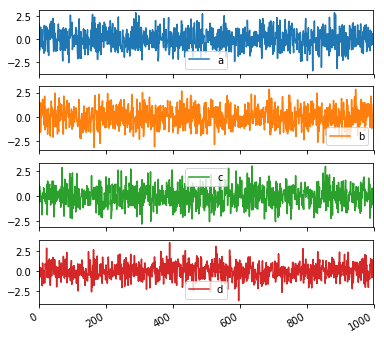

In [49]:
df.plot(subplots=True, figsize=(6, 6));